## how interest in bank.sol is calculated

interest is a function of the liquidity pool and the size of the user's loan to proportional to the total amount loaned out


In [39]:
# size of liquidity pool - 10 ether
deposited = 10e18

# size of all loans - 1 ether
lended = 1e18

# size of user's loan
loan = 1e18

# liquidity available in ether
available = deposited - lended

# calculate ether to be paid back in full
payment = (deposited * loan) / available

# calculate amount to be paid in addition to loan
interest = payment - loan

# loan + interest = payment 
print(loan + interest)

1.111111111111111e+18


In [40]:
# time loan was taken out
blocktime=0

# 2102400 blocks later i.e. one year later
timenow=2102400

# time loan was out
time = timenow-blocktime

# simple continuous interest
interestA = interest * time / 2102400

#print(interestC)

# total amount due
paymentDue = loan + interest + interestA
print(paymentDue)

1.222222222222222e+18


In [41]:
# blocks per day
2102400/365

5760.0

In [42]:
def liquidityPool(deposited):
    #deposited = 10
    lended = 1
    loan = 1
    available = deposited - lended
    payment = (deposited * loan) / available
    interest = payment - loan
    blocktime=0
    timenow=2102400
    time = timenow-blocktime
    interestA = interest * time / 2102400
    paymentDue = loan + interest + interestA
    totalInterest = interest + interestA
    
    return totalInterest
    
    
def lendingPool(lended):
    deposited = 100
    #lended = 1
    loan = 1
    available = deposited - lended
    payment = (deposited * loan) / available
    interest = payment - loan
    blocktime=0
    timenow=2102400
    time = timenow-blocktime
    interestA = interest * time / 2102400
    paymentDue = loan + interest + interestA
    totalInterest = interest + interestA
    
    return totalInterest

def timeLoaned(timenow):
    deposited = 100
    lended = 1
    loan = 1
    available = deposited - lended
    payment = (deposited * loan) / available
    interest = payment - loan
    blocktime=0
    #timenow=2102400
    time = timenow-blocktime
    interestA = interest * time / 2102400
    paymentDue = loan + interest + interestA
    totalInterest = interest + interestA
    
    return totalInterest

In [43]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-42-bd02390524d0>:6: RuntimeWarning: divide by zero encountered in true_divide
  payment = (deposited * loan) / available


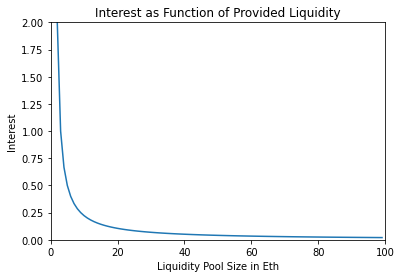

In [44]:
x1 = np.arange(0, 100, 1)
y1 = liquidityPool(x1)
plt.plot(x1, y1)
plt.axis([0, 100, 0, 2])
plt.title("Interest as Function of Provided Liquidity")
plt.xlabel("Liquidity Pool Size in Eth")
plt.ylabel("Interest")
plt.show()

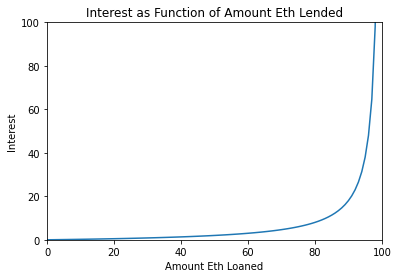

In [45]:
x2 = np.arange(0, 100, 1)
y2 = lendingPool(x2)
plt.plot(x2, y2)
plt.axis([0, 100, 0, 100])
plt.title("Interest as Function of Amount Eth Lended")
plt.xlabel("Amount Eth Loaned")
plt.ylabel("Interest")
plt.show()

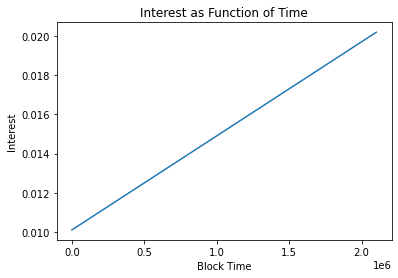

In [46]:
x3 = np.arange(0, 2102400, 1000)
y3 = timeLoaned(x3)
plt.plot(x3, y3)
plt.title("Interest as Function of Time")
plt.xlabel("Block Time")
plt.ylabel("Interest")
plt.show()

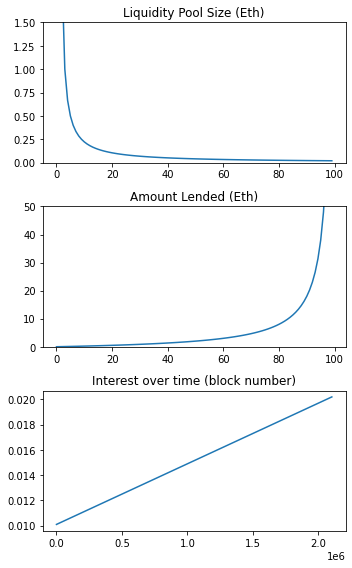

In [47]:
figure, axis = plt.subplots(3)

figure.set_figheight(8)
figure.set_figwidth(5)
  
# For Sine Function
axis[0].plot(x1, y1)
axis[0].set_title("Liquidity Pool Size (Eth)")
axis[0].set_ylim([0, 1.5])
  
# For Cosine Function
axis[1].plot(x2, y2)
axis[1].set_title("Amount Lended (Eth)")
axis[1].set_ylim([0, 50])

axis[2].plot(x3, y3)
axis[2].set_title("Interest over time (block number)")
  
plt.tight_layout()


plt.savefig('interest.jpeg', bbox_inches='tight', dpi=300)
plt.show()